In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pathlib



In [2]:
RUTA = pathlib.Path(__vsc_ipynb_file__).parent.parent # type: ignore

creditcard_data = pd.read_csv(f"{RUTA}/data/FraudulentECoomerce5.csv", encoding='latin1', sep=',', on_bad_lines='skip')
creditcard_data.shape

(1999899, 22)

In [3]:
creditcard_data.head(5)

,Amount,Errors,Is_Fraud,Gender,Direccion,Ciudad,IngresoPerCapita,IngresoAnual,DebitoTotal,FICO_Score,...,Day,Dia_Semana,Time,BancoCredito,TipoTarjeta,LimiteCredito,Merchant_Name,Merchant_City,Merchant_State,Zip
0,11473,SIN ERROR,0,Male,3385 Hill Lane,Burke,35563,72510,44317,727,...,2,Miércoles,17:30:00.0000000,Amex,Credit,33900,-7269691894846892021,Burke,VA,220150
1,-9900,SIN ERROR,0,Male,3385 Hill Lane,Burke,35563,72510,44317,727,...,20,Domingo,06:40:00.0000000,Amex,Credit,33900,1799189980464955940,Burke,VA,220150
2,13029,SIN ERROR,0,Male,3385 Hill Lane,Burke,35563,72510,44317,727,...,29,Martes,10:39:00.0000000,Amex,Credit,33900,1913477460590765860,Vienna,VA,221820
3,5500,SIN ERROR,0,Male,3385 Hill Lane,Burke,35563,72510,44317,727,...,17,Domingo,07:07:00.0000000,Amex,Credit,33900,2027553650310142703,Burke,VA,220150
4,1167,SIN ERROR,0,Male,3385 Hill Lane,Burke,35563,72510,44317,727,...,18,Lunes,11:15:00.0000000,Amex,Credit,33900,7069584154815291371,Burke,VA,220150


In [4]:
creditcard_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999899 entries, 0 to 1999898
Data columns (total 22 columns):
 #   Column            Dtype 
---  ------            ----- 
 0   Amount            int64 
 1   Errors            object
 2   Is_Fraud          int64 
 3   Gender            object
 4   Direccion         object
 5   Ciudad            object
 6   IngresoPerCapita  int64 
 7   IngresoAnual      int64 
 8   DebitoTotal       int64 
 9   FICO_Score        int64 
 10  Year              int64 
 11  Month             int64 
 12  Day               int64 
 13  Dia_Semana        object
 14  Time              object
 15  BancoCredito      object
 16  TipoTarjeta       object
 17  LimiteCredito     int64 
 18  Merchant_Name     int64 
 19  Merchant_City     object
 20  Merchant_State    object
 21  Zip               int64 
dtypes: int64(12), object(10)
memory usage: 335.7+ MB


In [5]:
creditcard_data.describe()

,Amount,Is_Fraud,IngresoPerCapita,IngresoAnual,DebitoTotal,FICO_Score,Year,Month,Day,LimiteCredito,Merchant_Name,Zip
count,1.999899e+06,1.999899e+06,1.999899e+06,1.999899e+06,1.999899e+06,1.999899e+06,1.999899e+06,1.999899e+06,1.999899e+06,1.999899e+06,1.999899e+06,1.999899e+06
mean,4.360559e+03,1.252563e-03,2.395608e+04,4.661556e+04,5.850282e+04,7.124121e+02,2.011960e+03,6.525957e+00,1.571410e+01,1.525499e+04,-4.833573e+17,4.492072e+05
std,8.173666e+03,3.536941e-02,1.189533e+04,2.446291e+04,5.261724e+04,6.704140e+01,5.105749e+00,3.470710e+00,8.795411e+00,1.217587e+04,4.761139e+18,3.212435e+05
min,-5.000000e+04,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,4.800000e+02,1.991000e+03,1.000000e+00,1.000000e+00,0.000000e+00,-9.222899e+18,0.000000e+00
25%,9.220000e+02,0.000000e+00,1.694200e+04,3.271600e+04,1.728600e+04,6.830000e+02,2.008000e+03,3.000000e+00,8.000000e+00,7.688000e+03,-4.522165e+18,1.622900e+05
50%,3.020000e+03,0.000000e+00,2.115600e+04,4.084800e+04,5.167900e+04,7.140000e+02,2.013000e+03,7.000000e+00,1.600000e+01,1.332500e+04,-7.948098e+17,4.074000e+05
75%,6.509000e+03,0.000000e+00,2.754400e+04,5.401300e+04,8.493500e+04,7.550000e+02,2.016000e+03,1.000000e+01,2.300000e+01,2.031800e+04,3.189517e+18,7.522700e+05
max,4.351560e+05,1.000000e+00,1.631450e+05,3.070180e+05,5.162630e+05,8.500000e+02,2.020000e+03,1.200000e+01,3.100000e+01,1.512230e+05,9.222877e+18,9.992800e+05


In [6]:
#Evaluar columans erroneous
missing_values = creditcard_data.isnull().sum()
print("Valores nulos por columna:")
print(missing_values)

Valores nulos por columna:
Amount              0
Errors              0
Is_Fraud            0
Gender              0
Direccion           0
Ciudad              0
IngresoPerCapita    0
IngresoAnual        0
DebitoTotal         0
FICO_Score          0
Year                0
Month               0
Day                 0
Dia_Semana          0
Time                0
BancoCredito        0
TipoTarjeta         0
LimiteCredito       0
Merchant_Name       0
Merchant_City       0
Merchant_State      0
Zip                 0
dtype: int64


In [7]:
#Evaluar datos vacios
datos_vacios = creditcard_data.isna().sum().sort_values()
print("Valñores vacions por columna")
print(datos_vacios)


Valñores vacions por columna
Amount              0
Merchant_City       0
Merchant_Name       0
LimiteCredito       0
TipoTarjeta         0
BancoCredito        0
Time                0
Dia_Semana          0
Day                 0
Month               0
Year                0
FICO_Score          0
DebitoTotal         0
IngresoAnual        0
IngresoPerCapita    0
Ciudad              0
Direccion           0
Gender              0
Is_Fraud            0
Errors              0
Merchant_State      0
Zip                 0
dtype: int64


In [8]:
creditcard_data.head(5)
creditcard_data.shape

(1999899, 22)

In [9]:

# Eliminar columnas innecesarias
# ==============================================================================
creditcard_data = creditcard_data.drop(columns=['Direccion'])
creditcard_data = creditcard_data.drop(columns=['Day'])
creditcard_data = creditcard_data.drop(columns=['Merchant_Name'])
creditcard_data = creditcard_data.drop(columns=['Merchant_City'])
creditcard_data = creditcard_data.drop(columns=['Merchant_State'])
creditcard_data = creditcard_data.drop(columns=['Zip'])
creditcard_data = creditcard_data.drop(columns=['Ciudad'])
creditcard_data = creditcard_data.drop(columns=['Gender'])
creditcard_data.head(8)
creditcard_data.shape


(1999899, 14)

c:\Users\Userr\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Userr\AppData\Local\Temp\ipykernel_17588\2797174823.py:32: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(
c:\Users\Userr\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


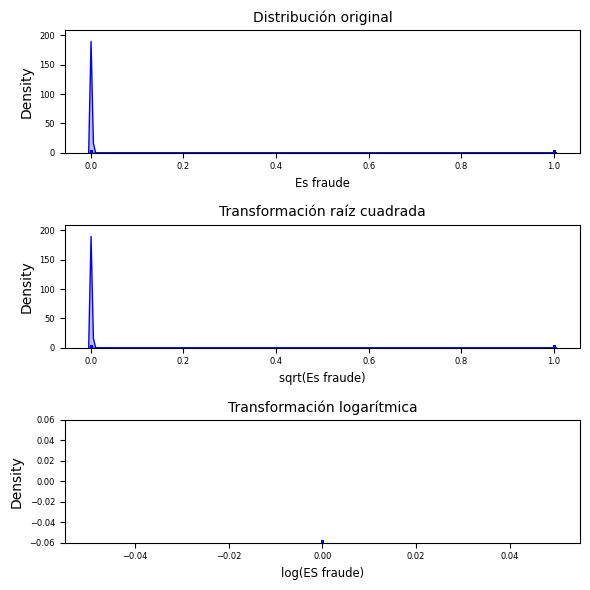

In [10]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(6, 6))
sns.kdeplot(
    creditcard_data.Is_Fraud,
    fill    = True,
    color   = "blue",
    ax      = axes[0]
)
sns.rugplot(
    creditcard_data.Is_Fraud,
    color   = "blue",
    ax      = axes[0]
)
axes[0].set_title("Distribución original", fontsize = 'medium')
axes[0].set_xlabel('Es fraude', fontsize='small') 
axes[0].tick_params(labelsize = 6)

sns.kdeplot(
    np.sqrt(creditcard_data.Is_Fraud),
    fill    = True,
    color   = "blue",
    ax      = axes[1]
)
sns.rugplot(
    np.sqrt(creditcard_data.Is_Fraud),
    color   = "blue",
    ax      = axes[1]
)
axes[1].set_title("Transformación raíz cuadrada", fontsize = 'medium')
axes[1].set_xlabel('sqrt(Es fraude)', fontsize='small') 
axes[1].tick_params(labelsize = 6)

sns.kdeplot(
    np.log(creditcard_data.Is_Fraud),
    fill    = True,
    color   = "blue",
    ax      = axes[2]
)
sns.rugplot(
    np.log(creditcard_data.Is_Fraud),
    color   = "blue",
    ax      = axes[2]
)
axes[2].set_title("Transformación logarítmica", fontsize = 'medium')
axes[2].set_xlabel('log(ES fraude)', fontsize='small') 
axes[2].tick_params(labelsize = 6)

fig.tight_layout()

In [11]:
#Verificar si alguna distribucion se ajusta al conjunto de datos
from fitter import Fitter
distribuciones = ['cauchy', 'chi2', 'expon',  'exponpow', 'gamma',
                  'norm', 'powerlaw', 'beta', 'logistic', 'lognorm', 'weibull_min']

fitter = Fitter(creditcard_data.Is_Fraud, distributions=distribuciones)
fitter.fit()
fitter.summary(Nbest=10, plot=False)

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
expon,7247.478548,7.850377e+04,7.852879e+04,inf,0.998747,0.0
norm,8149.374999,2.606421e+04,2.608923e+04,inf,0.512873,0.0
beta,inf,inf,inf,inf,NaN,NaN
cauchy,inf,inf,inf,inf,NaN,NaN
chi2,inf,inf,inf,inf,NaN,NaN
exponpow,inf,inf,inf,inf,NaN,NaN
gamma,inf,inf,inf,inf,NaN,NaN
lognorm,inf,inf,inf,inf,NaN,NaN
powerlaw,inf,inf,inf,inf,NaN,NaN
weibull_min,inf,inf,inf,inf,NaN,NaN


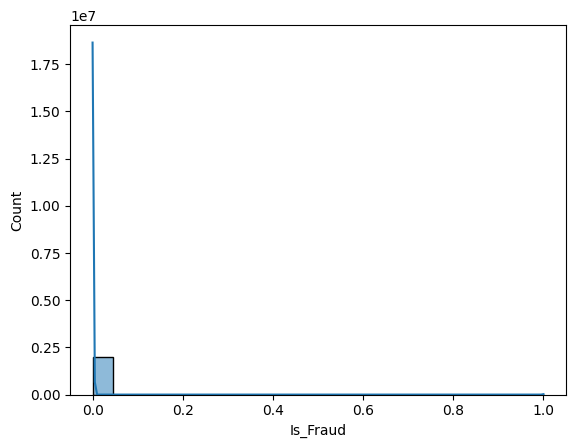

Is_Fraud
0    1997394
1       2505
Name: count, dtype: int64


In [12]:

# Visualizar la distribución de los datos
sns.histplot(creditcard_data['Is_Fraud'], kde=True)
plt.show()

# Verificar los valores únicos y su conteo
print(creditcard_data['Is_Fraud'].value_counts())


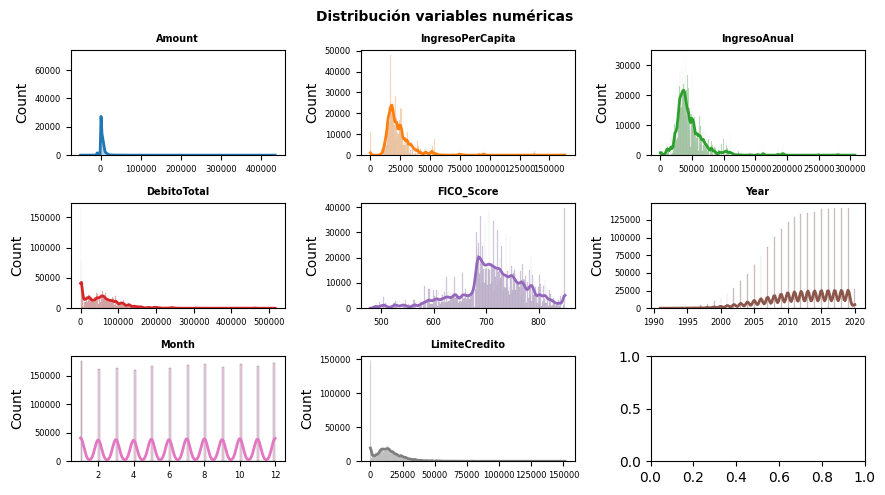

In [13]:
# Gráfico de distribución para cada variable numérica
# ==============================================================================
# Ajustar número de subplots en función del número de columnas
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(9, 5))
axes = axes.flat
columnas_numeric = creditcard_data.select_dtypes(include=['float64', 'int']).columns
columnas_numeric = columnas_numeric.drop('Is_Fraud')

for i, colum in enumerate(columnas_numeric):
    sns.histplot(
        data     = creditcard_data,
        x        = colum,
        stat     = "count",
        kde      = True,
        color    = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        line_kws = {'linewidth': 2},
        alpha    = 0.3,
        ax       = axes[i]
    )
    axes[i].set_title(colum, fontsize = 7, fontweight = "bold")
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")
    
    
fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribución variables numéricas', fontsize = 10, fontweight = "bold");

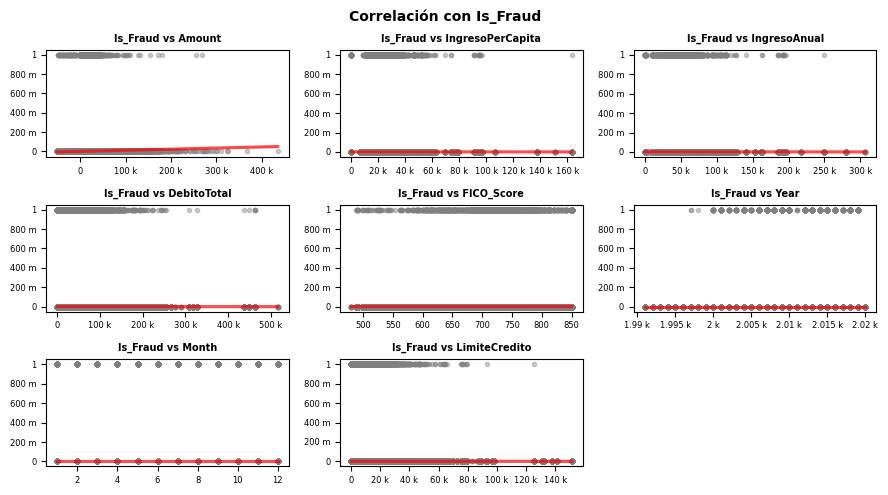

In [14]:
# Gráfico de distribución para cada variable numérica
# ==============================================================================
# Ajustar número de subplots en función del número de columnas
import matplotlib.ticker as ticker

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(9, 5))
axes = axes.flat
columnas_numeric = creditcard_data.select_dtypes(include=['float64', 'int']).columns
columnas_numeric = columnas_numeric.drop('Is_Fraud')

for i, colum in enumerate(columnas_numeric):
    sns.regplot(
        x           = creditcard_data[colum],
        y           = creditcard_data['Is_Fraud'],
        color       = "gray",
        marker      = '.',
        scatter_kws = {"alpha":0.4},
        line_kws    = {"color":"r","alpha":0.7},
        ax          = axes[i]
    )
    axes[i].set_title(f"Is_Fraud vs {colum}", fontsize = 7, fontweight = "bold")
    #axes[i].ticklabel_format(style='sci', scilimits=(-4,4), axis='both')
    axes[i].yaxis.set_major_formatter(ticker.EngFormatter())
    axes[i].xaxis.set_major_formatter(ticker.EngFormatter())
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

# Se eliminan los axes vacíos
for i in [8]:
    fig.delaxes(axes[i])
    
fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Correlación con Is_Fraud', fontsize = 10, fontweight = "bold");

In [18]:
# Correlación entre columnas numéricas
# ==============================================================================
def tidy_corr_matrix(corr_mat):
    '''
    Función para convertir una matrix de correlación de pandas en formato tidy
    '''
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)
    
    return(corr_mat)

corr_matrix = creditcard_data.select_dtypes(include=['float64', 'int']).corr(method='pearson')
tidy_corr_matrix(corr_matrix).head(10)

,variable_1,variable_2,r,abs_r
23,IngresoAnual,LimiteCredito,0.561201,0.561201
58,LimiteCredito,IngresoAnual,0.561201,0.561201
26,DebitoTotal,IngresoAnual,0.500011,0.500011
19,IngresoAnual,DebitoTotal,0.500011,0.500011
31,DebitoTotal,LimiteCredito,0.256375,0.256375
59,LimiteCredito,DebitoTotal,0.256375,0.256375
35,FICO_Score,DebitoTotal,-0.123596,0.123596
28,DebitoTotal,FICO_Score,-0.123596,0.123596
2,Amount,IngresoAnual,0.101980,0.101980
16,IngresoAnual,Amount,0.101980,0.101980


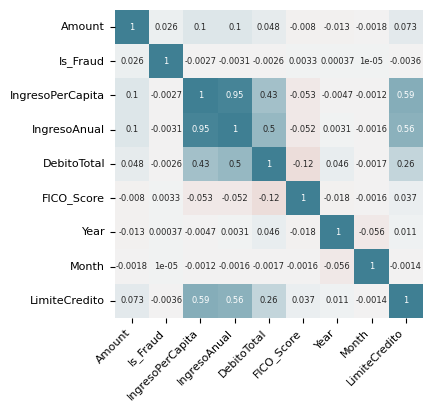

In [16]:
# Matriz de correlaciones
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4, 4))

sns.heatmap(
    corr_matrix,
    annot     = True,
    cbar      = False,
    annot_kws = {"size": 6},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(20, 220, n=200),
    square    = True,
    ax        = ax
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 8)

In [17]:
#Eliminar columas que tienen una correlacion alta
creditcard_data = creditcard_data.drop(columns=['IngresoPerCapita'])
creditcard_data.head(8)
creditcard_data.shape

(1999899, 13)

In [19]:
# Variables cualitativas (tipo object)
# ==============================================================================
creditcard_data.select_dtypes(include=['object']).describe()

,Errors,Dia_Semana,Time,BancoCredito,TipoTarjeta
count,1999899,1999899,1999899,1999899,1999899
unique,8,7,1440,4,3
top,SIN ERROR,Sábado,12:31:00.0000000,Mastercard,Debit
freq,1967955,287048,2575,1074396,1234302


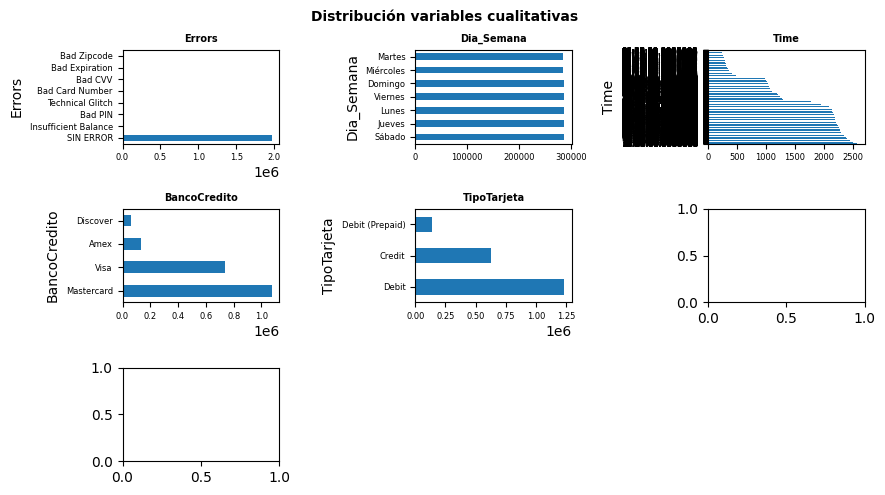

In [22]:
# Gráfico para cada variable cualitativa
# ==============================================================================
# Ajustar número de subplots en función del número de columnas
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(9, 5))
axes = axes.flat
columnas_object = creditcard_data.select_dtypes(include=['object']).columns

for i, colum in enumerate(columnas_object):
    creditcard_data[colum].value_counts().plot.barh(ax = axes[i])
    axes[i].set_title(colum, fontsize = 7, fontweight = "bold")
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")

# Se eliminan los axes vacíos
for i in [7, 8]:
    fig.delaxes(axes[i])
    
fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Distribución variables cualitativas',
             fontsize = 10, fontweight = "bold");

In [23]:
creditcard_data.Errors.value_counts().sort_index()

Errors
Bad CVV                     936
Bad Card Number            1084
Bad Expiration              910
Bad PIN                    4763
Bad Zipcode                 168
Insufficient Balance      20073
SIN ERROR               1967955
Technical Glitch           4010
Name: count, dtype: int64

In [24]:
#unir las columnas con pocas observaciones

dic_replace = {'Bad CVV': "Otros_errores",
               'Bad Card Number': "Otros_errores",
               'Bad Expiration': "Otros_errores",
               'Bad PIN': "Otros_errores",
               'Bad Zipcode': "Otros_errores",
               'Technical Glitch': "Otros_errores"
               }

creditcard_data['Errors'] = (
    creditcard_data['Errors']
    .map(dic_replace) 
    .fillna(creditcard_data['Errors'])
)

In [25]:
creditcard_data.Errors.value_counts().sort_index()

Errors
Insufficient Balance      20073
Otros_errores             11871
SIN ERROR               1967955
Name: count, dtype: int64

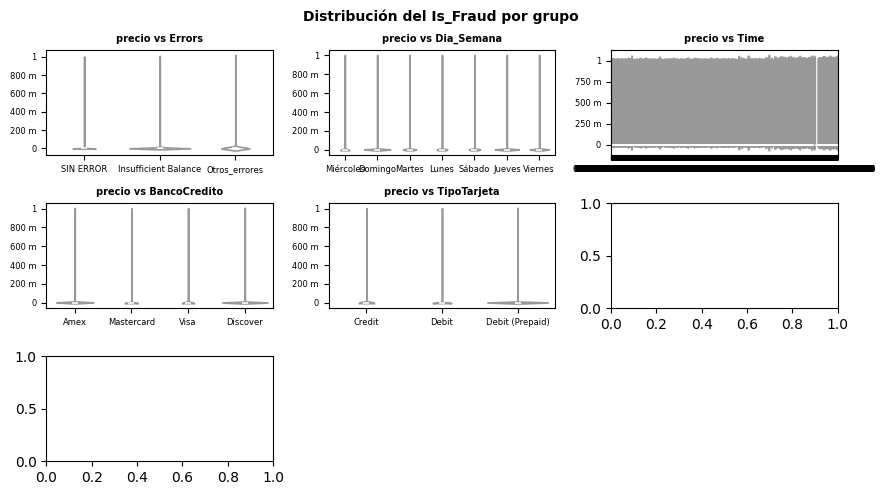

In [26]:
# Gráfico relación entre el precio y cada cada variables cualitativas
# ==============================================================================
# Ajustar número de subplots en función del número de columnas
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(9, 5))
axes = axes.flat
columnas_object = creditcard_data.select_dtypes(include=['object']).columns

for i, colum in enumerate(columnas_object):
    sns.violinplot(
        x     = colum,
        y     = 'Is_Fraud',
        data  = creditcard_data,
        color = "white",
        ax    = axes[i]
    )
    axes[i].set_title(f"precio vs {colum}", fontsize = 7, fontweight = "bold")
    axes[i].yaxis.set_major_formatter(ticker.EngFormatter())
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

# Se eliminan los axes vacíos
for i in [7, 8]:
    fig.delaxes(axes[i])
    
fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Distribución del Is_Fraud por grupo', fontsize = 10, fontweight = "bold");

In [27]:
#transfpormar la columa time
creditcard_data['Time'] = pd.to_datetime(creditcard_data['Time'], format='%H:%M:%S.%f')

In [28]:
#Escalara la columna time
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
creditcard_data[['Time']] = scaler.fit_transform(creditcard_data[['Time']])

In [32]:
creditcard_data.head(5)

,Amount,Errors,Is_Fraud,IngresoAnual,DebitoTotal,FICO_Score,Year,Month,Dia_Semana,Time,BancoCredito,TipoTarjeta,LimiteCredito
0,0.870166,SIN ERROR,-0.035414,1.058518,-0.269604,0.217595,-4.105101,-1.592169,Miércoles,0.905811,Amex,Credit,1.531309
1,-1.744696,SIN ERROR,-0.035414,1.058518,-0.269604,0.217595,-4.105101,-1.592169,Domingo,-1.230862,Amex,Credit,1.531309
2,1.060533,SIN ERROR,-0.035414,1.058518,-0.269604,0.217595,-4.105101,-1.592169,Martes,-0.445224,Amex,Credit,1.531309
3,0.139404,SIN ERROR,-0.035414,1.058518,-0.269604,0.217595,-4.105101,-1.304044,Domingo,-1.142108,Amex,Credit,1.531309
4,-0.390713,SIN ERROR,-0.035414,1.058518,-0.269604,0.217595,-4.105101,-1.304044,Lunes,-0.326885,Amex,Credit,1.531309


In [31]:
#***********   PREPROCESADO    ******************

# Se estandarizan las columnas numéricas y se hace one-hot-encoding de las 
# columnas cualitativas. 

numeric_columns = creditcard_data.select_dtypes(include=['float64', 'int64']).columns
scaler = StandardScaler()
creditcard_data[numeric_columns] = scaler.fit_transform(creditcard_data[numeric_columns])

In [35]:
creditcard_data['TipoTarjeta'].unique()
creditcard_data['Errors'].unique()
creditcard_data['BancoCredito'].unique()
creditcard_data['Dia_Semana'].unique()

array(['Miércoles', 'Domingo', 'Martes', 'Lunes', 'Sábado', 'Jueves',
       'Viernes'], dtype=object)

In [36]:

#Aplicando encoding OHE a las columnas 

from sklearn.preprocessing import OneHotEncoder

one_hot_encoder = OneHotEncoder(sparse=False)
errors_encoded = one_hot_encoder.fit_transform(creditcard_data[['Errors', 'Dia_Semana', 'BancoCredito', 'TipoTarjeta']])

# Crear un DataFrame con los resultados
encoded = pd.DataFrame(errors_encoded, columns=one_hot_encoder.get_feature_names_out(['Errors', 'Dia_Semana', 'BancoCredito', 'TipoTarjeta']))

# Concatenar el DataFrame original con el DataFrame codificado
creditcard_data = pd.concat([creditcard_data, encoded], axis=1)

c:\Users\Userr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [37]:

#Borrar colummas codificadas
#creditcard_data = creditcard_data.drop(columns=['Errors', 'Dia_Semana', 'BancoCredito', 'TipoTarjeta'])
creditcard_data = creditcard_data.drop(columns=['Errors'])
creditcard_data = creditcard_data.drop(columns=['Dia_Semana'])
creditcard_data = creditcard_data.drop(columns=['BancoCredito'])
creditcard_data = creditcard_data.drop(columns=['TipoTarjeta'])

In [38]:
creditcard_data.info()
null_counts = creditcard_data.isnull().sum()
print(null_counts)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999899 entries, 0 to 1999898
Data columns (total 26 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   Amount                       float64
 1   Is_Fraud                     float64
 2   IngresoAnual                 float64
 3   DebitoTotal                  float64
 4   FICO_Score                   float64
 5   Year                         float64
 6   Month                        float64
 7   Time                         float64
 8   LimiteCredito                float64
 9   Errors_Insufficient Balance  float64
 10  Errors_Otros_errores         float64
 11  Errors_SIN ERROR             float64
 12  Dia_Semana_Domingo           float64
 13  Dia_Semana_Jueves            float64
 14  Dia_Semana_Lunes             float64
 15  Dia_Semana_Martes            float64
 16  Dia_Semana_Miércoles         float64
 17  Dia_Semana_Sábado            float64
 18  Dia_Semana_Viernes           float64
 19  

In [47]:
creditcard_data.head(5)

,Amount,Is_Fraud,IngresoAnual,DebitoTotal,FICO_Score,Year,Month,Time,LimiteCredito,Errors_Insufficient Balance,...,Dia_Semana_Miércoles,Dia_Semana_Sábado,Dia_Semana_Viernes,BancoCredito_Amex,BancoCredito_Discover,BancoCredito_Mastercard,BancoCredito_Visa,TipoTarjeta_Credit,TipoTarjeta_Debit,TipoTarjeta_Debit (Prepaid)
0,0.870166,0,1.058518,-0.269604,0.217595,-4.105101,-1.592169,0.905811,1.531309,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,-1.744696,0,1.058518,-0.269604,0.217595,-4.105101,-1.592169,-1.230862,1.531309,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.060533,0,1.058518,-0.269604,0.217595,-4.105101,-1.592169,-0.445224,1.531309,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.139404,0,1.058518,-0.269604,0.217595,-4.105101,-1.304044,-1.142108,1.531309,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,-0.390713,0,1.058518,-0.269604,0.217595,-4.105101,-1.304044,-0.326885,1.531309,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [45]:
creditcard_data['Is_Fraud'].unique()

array([-0.03541376, 28.23761453])

In [46]:
umbral = 0  # Define el umbral 

# Convertimos los valores a binarios usando el umbral
creditcard_data['Is_Fraud'] = np.where(creditcard_data['Is_Fraud'] >= umbral, 1, 0)

In [49]:
# prompt: guardar la variable creditcard_data como un archivo .csv

creditcard_data.to_csv('Data2.csv', index=False)


In [50]:
data = pd.read_csv('Data2.csv')  # Reemplaza con la ruta a tu archivo de datos

# Separar 5 registros con Is_Fraud = 1
fraud_data = data[data['Is_Fraud'] == 1].sample(n=5, random_state=42)

# Separar 5 registros con Is_Fraud = 0
non_fraud_data = data[data['Is_Fraud'] == 0].sample(n=5, random_state=42)

# Combinar los datos separados en un nuevo DataFrame
verification_data = pd.concat([fraud_data, non_fraud_data])

# Guardar los datos separados en un nuevo archivo CSV
verification_data.to_csv('DatosVerificacion.csv', index=False)

# Eliminar los datos extraídos del DataFrame original
data = data.drop(fraud_data.index)
data = data.drop(non_fraud_data.index)

# Guardar el DataFrame original modificado si lo necesitas
data.to_csv('Data2.csv', index=False)

In [54]:
verification_data.head()

,Amount,Is_Fraud,IngresoAnual,DebitoTotal,FICO_Score,Year,Month,Time,LimiteCredito,Errors_Insufficient Balance,...,Dia_Semana_Miércoles,Dia_Semana_Sábado,Dia_Semana_Viernes,BancoCredito_Amex,BancoCredito_Discover,BancoCredito_Mastercard,BancoCredito_Visa,TipoTarjeta_Credit,TipoTarjeta_Debit,TipoTarjeta_Debit (Prepaid)
1433364,-0.252097,1,-0.847510,-0.267951,-0.095644,0.791341,-0.439667,0.439030,-0.315377,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
266861,-0.306663,1,-0.956491,-1.063222,-1.438098,-1.167236,-1.592169,0.521210,0.781876,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1660810,-0.426682,1,-0.359179,-0.728237,-0.811620,1.183057,-0.151542,1.287125,0.541400,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
380167,0.908092,1,-0.475559,1.446830,0.784409,-0.971378,-0.727793,-0.346608,-0.653341,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1071892,0.370023,1,0.241036,0.705799,-0.095644,0.203768,0.712835,-0.169100,0.704920,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [55]:
# Correlación entre columnas numéricas
# ==============================================================================

def tidy_corr_matrix(corr_mat):
    '''
    Función para convertir una matriz de correlación de pandas en formato tidy
    '''
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)

    return(corr_mat)



corr_matrix = creditcard_data.select_dtypes(include=['float64', 'int']).corr(method='pearson')
tidy_corr_matrix(corr_matrix).head(10)

,variable_1,variable_2,r,abs_r
622,TipoTarjeta_Credit,TipoTarjeta_Debit,-0.860998,0.860998
647,TipoTarjeta_Debit,TipoTarjeta_Credit,-0.860998,0.860998
568,BancoCredito_Mastercard,BancoCredito_Visa,-0.821484,0.821484
593,BancoCredito_Visa,BancoCredito_Mastercard,-0.821484,0.821484
245,Errors_Insufficient Balance,Errors_SIN ERROR,-0.790325,0.790325
295,Errors_SIN ERROR,Errors_Insufficient Balance,-0.790325,0.790325
271,Errors_Otros_errores,Errors_SIN ERROR,-0.606520,0.606520
296,Errors_SIN ERROR,Errors_Otros_errores,-0.606520,0.606520
210,LimiteCredito,IngresoAnual,0.561201,0.561201
60,IngresoAnual,LimiteCredito,0.561201,0.561201


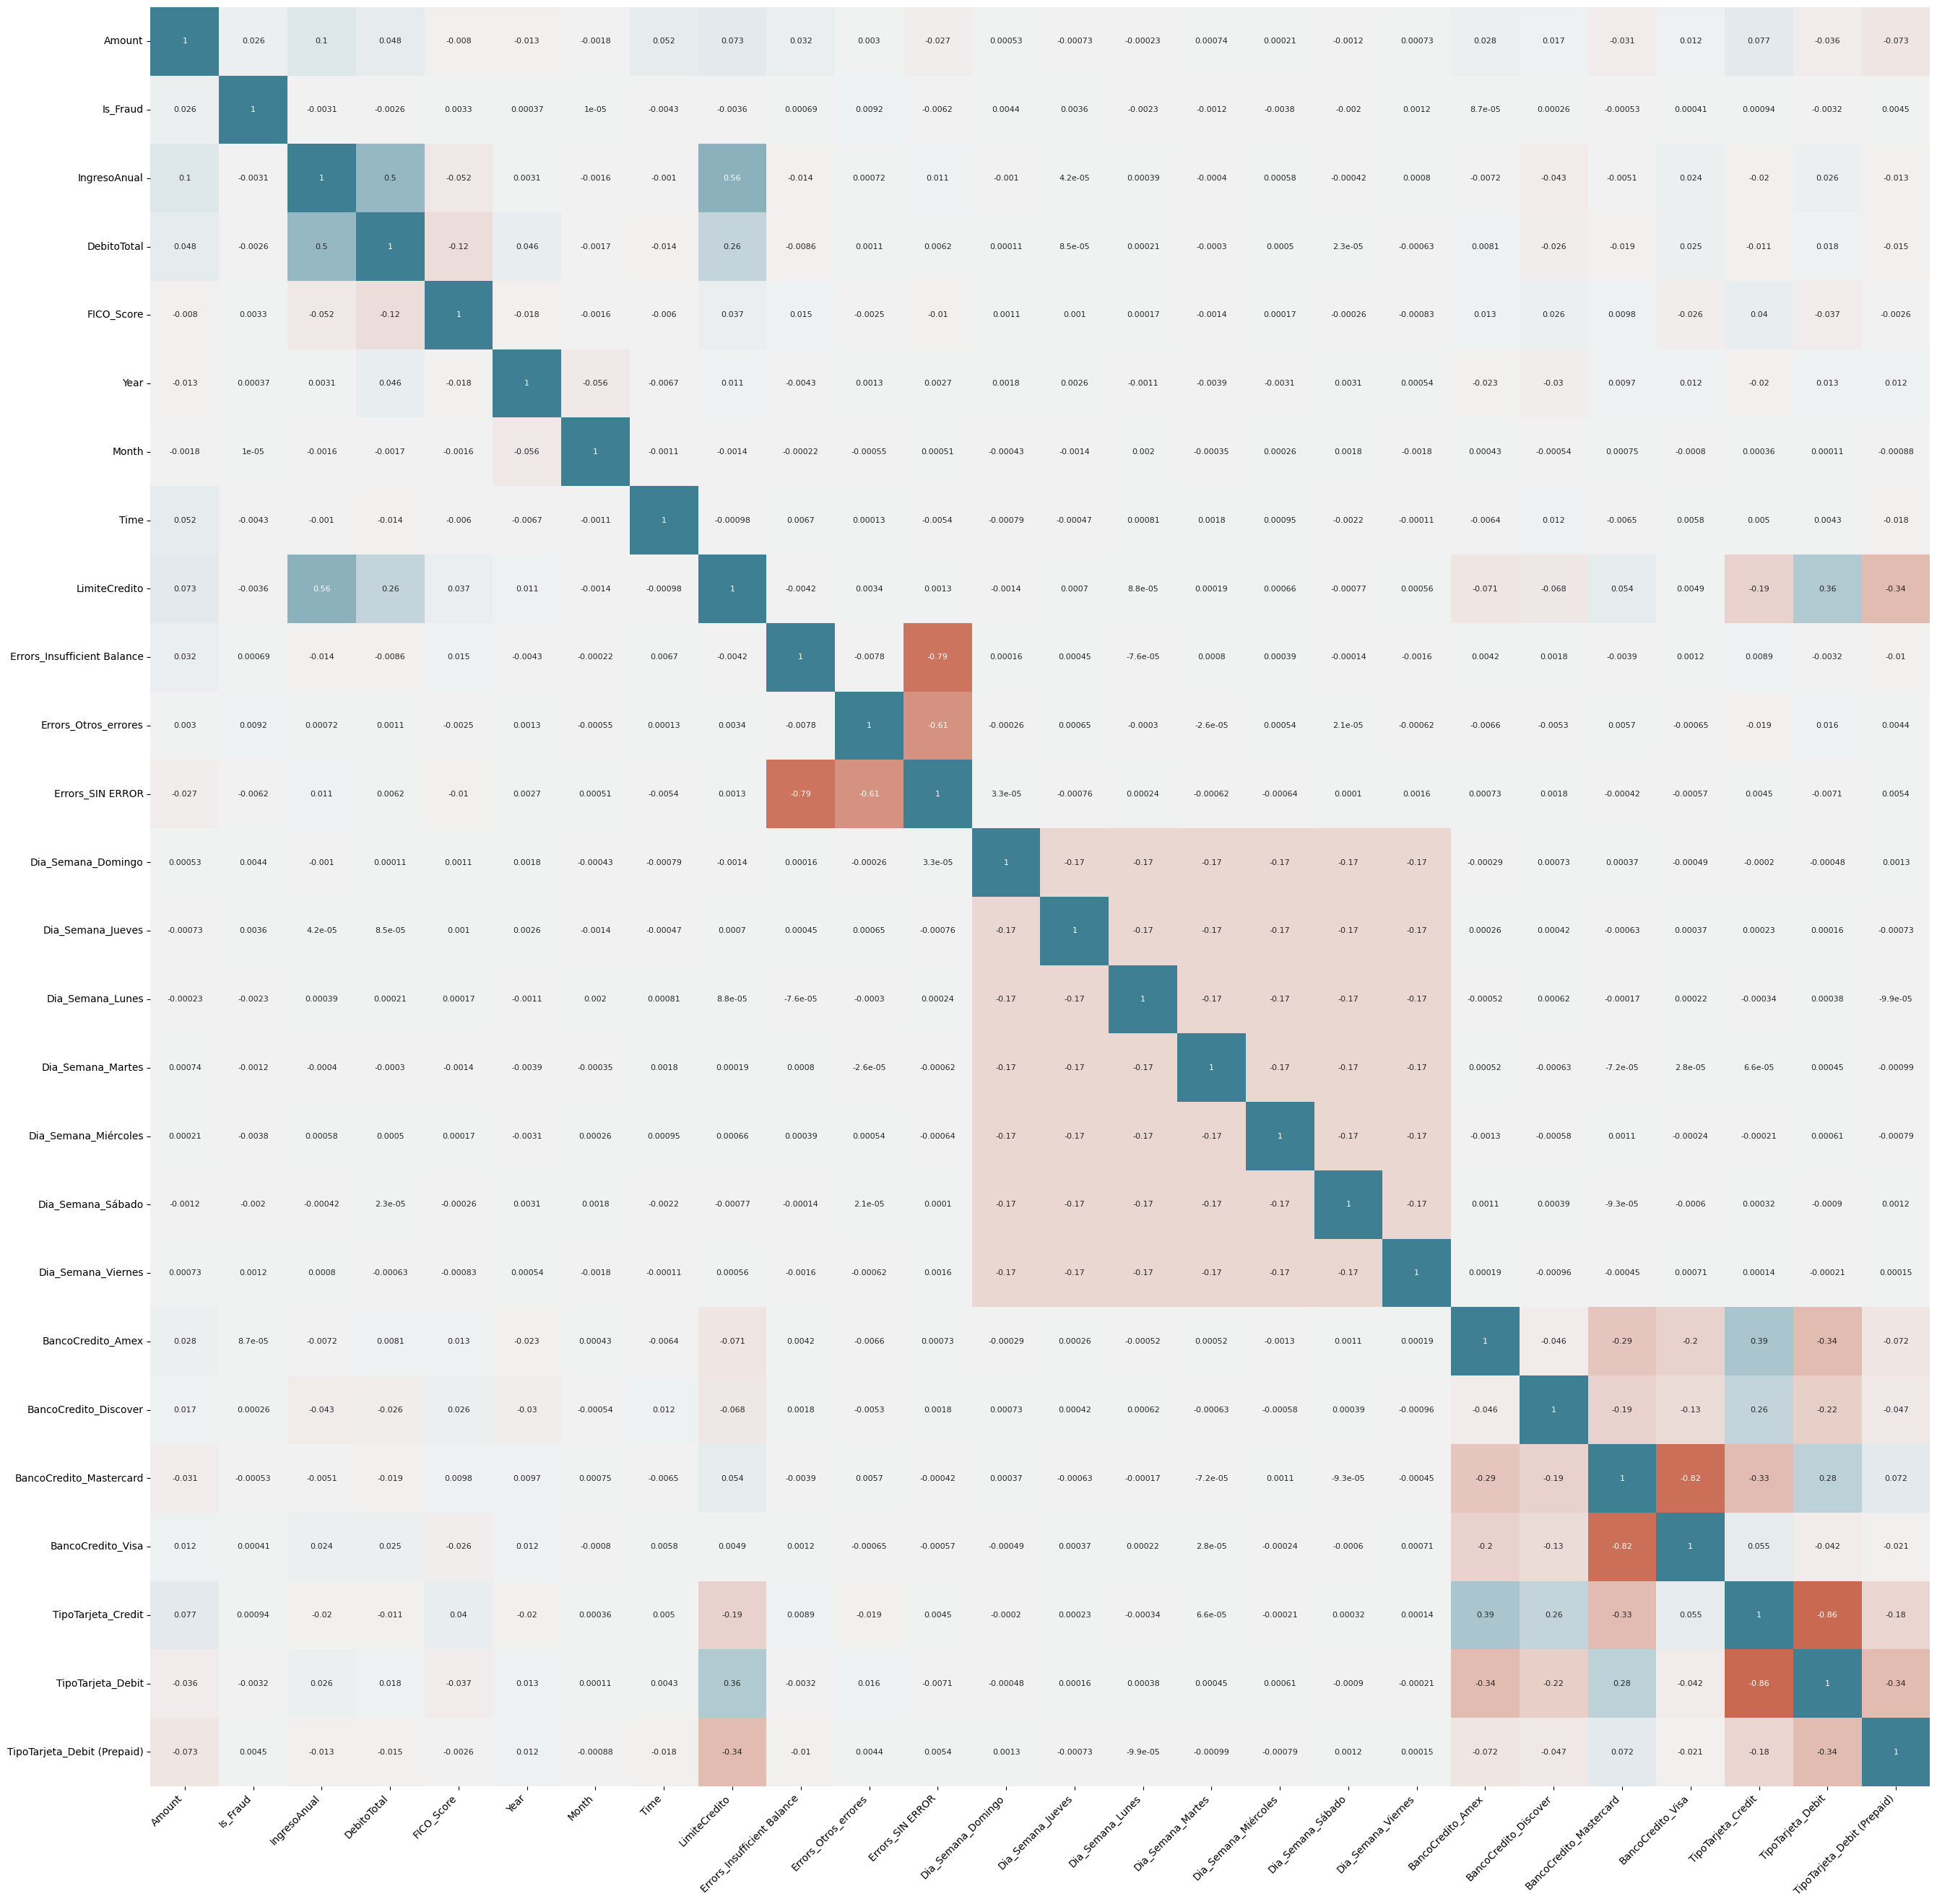

In [56]:
# Heatmap matriz de correlaciones
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(32, 32))

sns.heatmap(
    corr_matrix,
    annot     = True,
    cbar      = False,
    annot_kws = {"size": 8},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(20, 220, n=200),
    square    = True,
    ax        = ax
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 10)